Many real-life structures can be represented as networks. To explain the emergence of these structures, different theoretical models have been proposed. Here we will investigate the duplication models.

The duplcation models are a family of networks that are generated on the principle that a friend of your friend is also likely to be your friend. It is conjectured that such a principle is the main mechanism driving the evolution of social networks. 

Below, we generate such a network from the seed graph G0 by potentially adding a new node at each time. We will also allow for a so-called deletion step at each time. This is controlled by the parameter q. In particular, we flip a coin with head probability q each time. If the coin returns head, we add a new node to the existing network. The new node, say A, randomly picks a node, say B, in the existing graph, and befriends A with probability r. Node A then connects to each of the neighbours of B with probability p. Otherwise, if the coin returns tail, we erase all the links of a randomly chosen node in the existing network. 

Why the possible edge deletions? The edge deletions can be used represent attacks on the networks over time. For example, in a protein interaction network, where a node represents a protein, a protein may lose all its interactions with other proteins (represented by a link) if it is attacked.

Below we will simulate the duplication model, and explore some of its properties using NetworkX.

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
# generate the duplication model
# G0 is the initial network, m0 is the number of nodes in the initial network, 
# N is the number of nodes in final network, p duplication probability of the link to the neighbour
# q is probability of duplication and r is the probability that the new node connects
# to the randomly chosen node
def DDD_model(G0, m0, N, p, q, r):
    for source in range(m0, N+1):
        existing_nodes = [j for j in G0.nodes()]
        # choose target node uar
        target = random.choice(existing_nodes) 
        # all neighbours of target
        neighbours = [nbr for nbr in G0.neighbors(target)]
        # if duplication
        if random.random() <= q:
             # add the new node
            G0.add_node(source)
            if random.random() <= r:
                G0.add_edge(source, target)
            while len(neighbours)>0:
                nbr = neighbours.pop()
                if random.random() <= p:
                    G0.add_edge(source, nbr)
        else:
            while len(neighbours)>0:
                nbr = neighbours.pop()
                G0.remove_edge(target, nbr)
    return G0

Now that we have a function that generates the network, let's plot the network and a histogram that count the number of nodes with certain number of links.

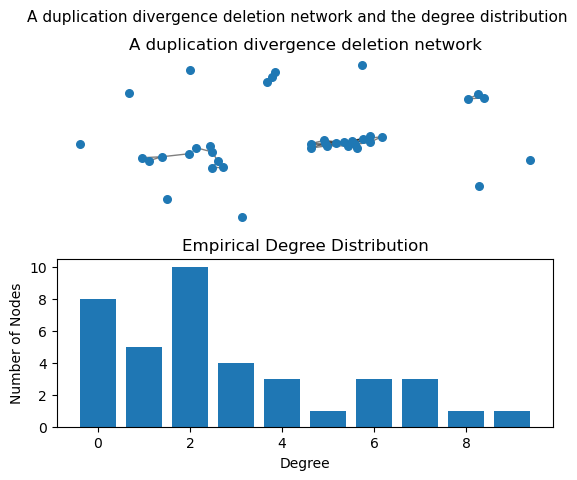

In [34]:
import numpy as np
G0 = nx.complete_graph(3)
G = DDD_model(G0, 3, 50, 0.5, 0.7, 1)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
fig, ax = plt.subplots(2, 1, constrained_layout=False)
fig.suptitle('A duplication divergence deletion network and the degree distribution', fontsize=11)

#ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(G, seed=5511)
nx.draw_networkx_nodes(G, pos, ax=ax[0], node_size=30)
nx.draw_networkx_edges(G, pos, ax=ax[0], alpha=0.5)
ax[0].set_title("A duplication divergence deletion network")
ax[0].set_axis_off()

ax[1].bar(*np.unique(degree_sequence, return_counts=True))
ax[1].set_title("Empirical Degree Distribution")
ax[1].set_xlabel("Degree")
ax[1].set_ylabel("Number of Nodes")

plt.show()

When studying networks, quite often we are interested in detecting the underlying communities that we do not observe when collecting the data. The Newman-Girvan algorithm is designed to find these communities. Below we compare the duplication model (with no deletion of edges) to the preferential attachment network, another popular model for studying social networks.

/var/folders/d5/hs470kjx307fl2d9tq8h7xc80000gn/T/ipykernel_4907/224083291.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i)


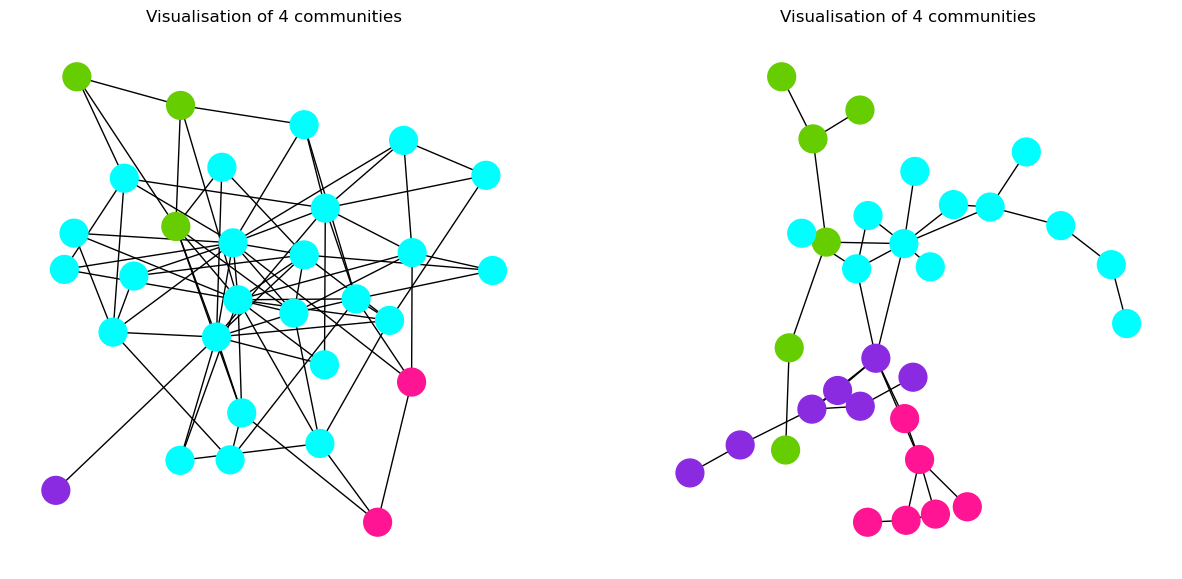

In [18]:
import random
import numpy as np

# Generate preferential attachment graph and find communities using Girvan-Newman
G1 = nx.barabasi_albert_graph(n=30, m=3)
communities1 = list(nx.community.girvan_newman(G1))


# Generate DDD (with no deletion) graph and find communities using Girvan-Newman
G0 = nx.complete_graph(3)
G2 = DDD_model(G0, 3, 30, 0.1, 1, 1)
communities2 = list(nx.community.girvan_newman(G2))

# Below we adapt the commands in the documentation of NetworkX: "Community Detection using Girvan-Newman"
# coloring the nodes according the communities 
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#00FFFF", "#8A2BE2", "#66CD00", "#FF1493", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for cluster in communities:
            if node in cluster:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=21)
    plt.subplot(1, 2, i)
    plt.title(f"Visualisation of {len(communities)} communities")
    nx.draw(
        graph,
        pos=pos,
        node_size=300,
        node_color=node_colors,
        with_labels=False,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(1, figsize=(15, 7))

# Plot graph with colouring based on communities
visualize_communities(G1, communities1[2], 1) 
visualize_communities(G2, communities2[2], 2)

There are many other questions that one can ask about the properties of networks. Below, we find the shortest path from one selected node to the other. Again, we use the duplication network (with no deletion of edges) as our underlying network.

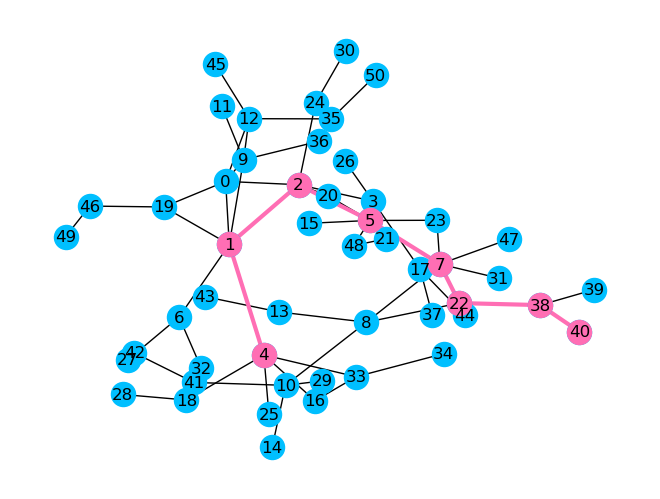

In [29]:
# Generate DDD (with no deletion) graph on 50 nodes and find communities using Girvan-Newman
G0 = nx.complete_graph(3)
G = DDD_model(G0, 3, 50, 0.1, 1, 1)
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=21)
nx.draw(G, pos, node_color='#00BFFF', with_labels=True)
# draw shortest path from node 4 to node 40 
start = 4
end = 40
spath = nx.shortest_path(G, source=start,target=end)
spath_edges = list(zip(spath, spath[1:]))
nx.draw_networkx_nodes(G, pos, nodelist= spath, node_color='#FF6EB4')
nx.draw_networkx_edges(G, pos, edgelist= spath_edges, edge_color='#FF6EB4', width=3)
plt.show()


There are more properties of a network that can be explored, such the longest path, the number of triangles, just to name a few. Networkx is a great package for doing so. Hope you enjoy this short introduction to networks!